### Importing the necessary libraries needed for this EDA:

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset into pandas dataframe
Showing the first 10 rows to quickly check out what the dataset's columns and rows looks like. This is so I can familiarise myself with all the different variables that this dataset contains and determine which ones will be useful later during my analysis and which ones won't be.
I instantly noticed a lot of missing values for the salary_year_avg and salary_hour_avg. This is all intentional. These missings values are because some companies don't show the job salary for that specific job listing.

In [8]:
df = pd.read_csv(r"C:\Users\eldon\OneDrive\Desktop\Data Job Market Project\Data-Job-Market-Analysis-Project\job_postings_flat_original.csv")
df.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,"Summer Internship -Data Analyst Intern, Risk M...","Marlborough, MA",via Boatingrevealed.com,"Full-time, Part-time, and Internship",False,"New York, United States",2024-01-01,False,True,United States,NaN,NaN,BJ's Wholesale Club,['excel'],{'analyst_tools': ['excel']}
1,Data Analyst,"Staff Data Analyst Operations, Infrastructure ...","Fremont, CA",via ClimateTechList,Full-time,False,"California, United States",2024-01-01,True,False,United States,NaN,NaN,Tesla,"['tableau', 'flow']","{'analyst_tools': ['tableau'], 'other': ['flow']}"
2,Data Analyst,Junior Data Analyst - Entry Level,"Waco, TX",via ZipRecruiter,Full-time and Part-time,False,"Texas, United States",2024-01-01,True,False,United States,NaN,NaN,Next Recruiting,NaN,NaN
3,Data Analyst,"Data Analyst/Engineer, Supply Chain Optimizati...","Austin, TX",via ClimateTechList,Internship,False,"Texas, United States",2024-01-01,False,False,United States,NaN,NaN,Tesla,['spring'],{'libraries': ['spring']}
4,Data Scientist,It analyst,"Tampa, FL",via Talent.com,Full-time,False,"Florida, United States",2024-01-01,True,False,United States,NaN,NaN,VirtualVocations,NaN,NaN
5,Senior Data Scientist,"Senior Data Scientist, Growth",Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2024-01-01,False,True,United States,NaN,NaN,Atlassian,"['sql', 'python', 'r', 'c', 'tableau', 'micros...","{'analyst_tools': ['tableau', 'microstrategy',..."
6,Machine Learning Engineer,"Machine Learning Scientist, Prescient Design","San Ramon, CA",via Monster,Full-time,False,"California, United States",2024-01-01,False,False,United States,NaN,NaN,Genentech,"['python', 'pytorch', 'github']","{'libraries': ['pytorch'], 'other': ['github']..."
7,Machine Learning Engineer,Associate Machine Learning Scientist - MLDD,"Menlo Park, CA",via Monster,Full-time,False,"California, United States",2024-01-01,False,False,United States,NaN,NaN,Genentech,"['python', 'pytorch', 'tensorflow', 'github']","{'libraries': ['pytorch', 'tensorflow'], 'othe..."
8,Data Analyst,Data analyst,"Dallas, TX",via Talent.com,Full-time,False,"Texas, United States",2024-01-01,True,False,United States,NaN,NaN,TEKsystems,NaN,NaN
9,Data Scientist,"Associate Director, Data Science and Analytics","Birmingham, AL",via BeBee,Full-time,False,"Illinois, United States",2024-01-01,False,True,United States,NaN,NaN,Razorfish,"['sql', 'r', 'python', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr..."


I also notice that the job skills and job_type_skills columns contain an unusual type of data. Job skills contains a list of data (in python syntax) while job_type_skills is in JSON form. This can be quite tricky to manipulate with anything. I will definitely need to make different tables for these two columns. I will do this during the data cleaning process.

# Exploratory Data Analysis


Checking out the overall structure and the attributes of the dataframe with `info()`.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478895 entries, 0 to 478894
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        478895 non-null  object 
 1   job_title              478894 non-null  object 
 2   job_location           477522 non-null  object 
 3   job_via                478889 non-null  object 
 4   job_schedule_type      470983 non-null  object 
 5   job_work_from_home     478895 non-null  bool   
 6   search_location        478895 non-null  object 
 7   job_posted_date        478895 non-null  object 
 8   job_no_degree_mention  478895 non-null  bool   
 9   job_health_insurance   478895 non-null  bool   
 10  job_country            478574 non-null  object 
 11  salary_year_avg        20335 non-null   float64
 12  salary_hour_avg        10076 non-null   float64
 13  company_name           478888 non-null  object 
 14  job_skills             410025 non-nu

The `describe()` method gives us some statistical information about the numerical columns in our data frame. The only numerical columns in the data frame are for the salaries. This shows us the distribution between jobs that give a yearly vs hourly salary, and their averages, standard deviations, mins & max values both columns.

In [10]:
df.describe()

,salary_year_avg,salary_hour_avg
count,20335.000000,10076.000000
mean,120587.961102,49.163177
std,48245.396350,25.607089
min,15000.000000,8.000000
25%,85975.000000,30.000000
50%,113250.000000,47.620000
75%,149589.000000,62.390000
max,920000.000000,250.000000


The `nunique()` method tells us some interesting information. There are 10 different general job titles within this dataset. These job listings are from 98,363 different companies from 160 different countries. 

In [11]:
df.nunique()

job_title_short              10
job_title                150350
job_location              16360
job_via                    7859
job_schedule_type            55
job_work_from_home            2
search_location             176
job_posted_date             366
job_no_degree_mention         2
job_health_insurance          2
job_country                 160
salary_year_avg            2666
salary_hour_avg            1000
company_name              98363
job_skills               117974
job_type_skills          117974
dtype: int64

# Finding some interesting and insightful information about the data
The analysis below is to tell me some quick facts about the dataset to help me gain more insight about the dataset. This will really help me later when I actually properly analyse this dataset. These are also quick facts that I am interested in about the data set.

### Interested in seeing what the yearly salary ceiling was.
Seems like the highest of the highest salaries are mostly for data scientists & data engineers

In [12]:
df.sort_values(by = "salary_year_avg", ascending = False).head(15)

#Seems like the highest of the highest salaries are mostly for data scientists & data engineers


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
438265,Data Scientist,Data Science Manager - Messaging and Inferred ...,California,Outscal,Full-time,False,"California, United States",2024-11-08,False,True,United States,920000.0,NaN,Netflix,NaN,NaN
215007,Data Scientist,Machine Learning Engineer/Data Scientist,South Africa,via Adzuna,Full-time,False,South Africa,2024-05-10,False,False,South Africa,870000.0,NaN,Goldman Tech Resourcing,"['python', 'fastapi', 'docker']","{'other': ['docker'], 'programming': ['python'..."
64706,Data Scientist,Data Scientist,"Dulles, VA",via Indeed,Full-time,False,"New York, United States",2024-02-07,False,True,United States,850000.0,NaN,3G HR SERVICES,"['python', 'sql', 'pandas', 'numpy', 'scikit-l...","{'analyst_tools': ['power bi'], 'libraries': [..."
79618,Data Engineer,"Manager, Content Data Engineering","Los Angeles, CA",via ShowbizJobs,Full-time,False,Georgia,2024-02-15,True,True,United States,640000.0,NaN,Netflix,NaN,NaN
424829,Data Scientist,VP of Data Science - Monetization Signal Growt...,"Menlo Park, CA",LinkedIn,Full-time,False,"California, United States",2024-10-16,True,True,United States,475000.0,NaN,Meta,NaN,NaN
437637,Data Engineer,Data Engineer (L5) - Content Production & Prom...,Anywhere,LinkedIn,Full-time,True,"New York, United States",2024-11-07,True,True,United States,445000.0,NaN,Netflix,NaN,NaN
452965,Data Engineer,Data Engineer (L5),"Panama City, Panama",Taro,Full-time,False,Panama,2024-12-07,True,False,Panama,445000.0,NaN,Netflix,NaN,NaN
128747,Senior Data Scientist,Senior Data Scientist,Anywhere,via EchoJobs,Full-time,True,Sudan,2024-03-13,False,True,Sudan,445000.0,NaN,Netflix,"['sql', 'python', 'r']","{'programming': ['sql', 'python', 'r']}"
448257,Data Analyst,Analytics Engineer (L5) - Live Quality of Expe...,Anywhere,LinkedIn,Full-time,True,"Illinois, United States",2024-12-01,True,True,United States,445000.0,NaN,Netflix,"['sql', 'python']","{'programming': ['sql', 'python']}"
448252,Data Engineer,Data Engineer (L5) - Growth Insights and Found...,Anywhere,LinkedIn,Full-time,True,"New York, United States",2024-12-01,True,True,United States,445000.0,NaN,Netflix,"['java', 'scala', 'sql', 'spark', 'spring']","{'libraries': ['spark', 'spring'], 'programmin..."


### Let's see how each general job title's yearly salary differs. 
I am using median instead of mean because as we saw before, there are quite a lot of especially high salaries that can skew the mean and make it quite misleading. We can avoid this problem by using median.

In [24]:
job_title_groups = df.groupby('job_title_short')
#job_title_groups['salary_year_avg'].mean()  
job_title_median_yearly = job_title_groups['salary_year_avg'].median() 

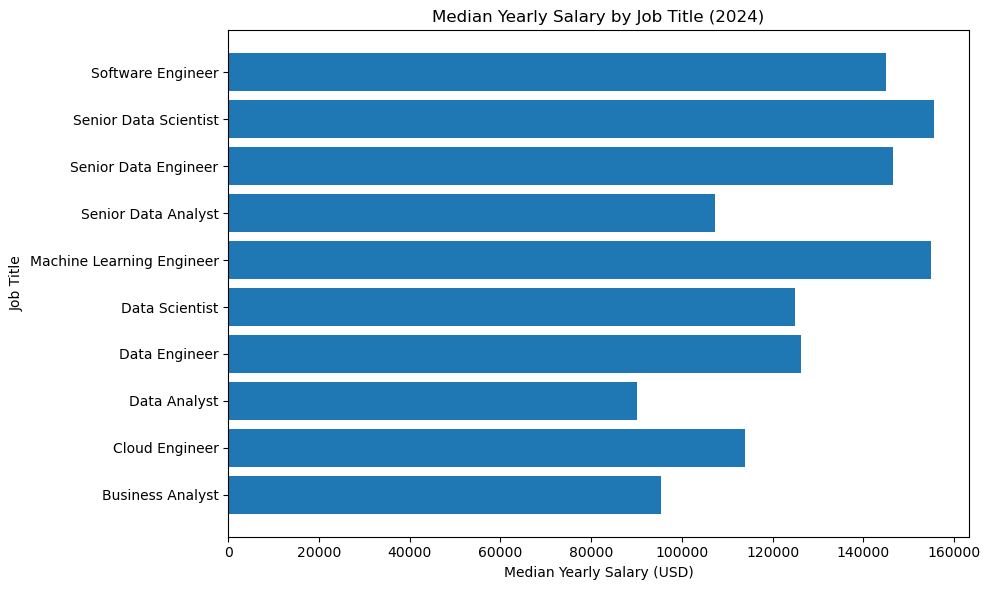

In [51]:
titles = job_title_median_yearly.index.tolist()
salaries = job_title_median_yearly.values.tolist()

plt.figure(figsize=(10, 6))
plt.barh(titles, salaries)
plt.xlabel("Median Yearly Salary (USD)")
plt.ylabel("Job Title")
plt.title("Median Yearly Salary by Job Title (2024)")
plt.tight_layout()
plt.show()

In [49]:
job_title_groups = df.groupby('job_title_short')
#job_title_groups['salary_hour_avg'].mean()
job_title_median_hourly = job_title_groups['salary_hour_avg'].median() 

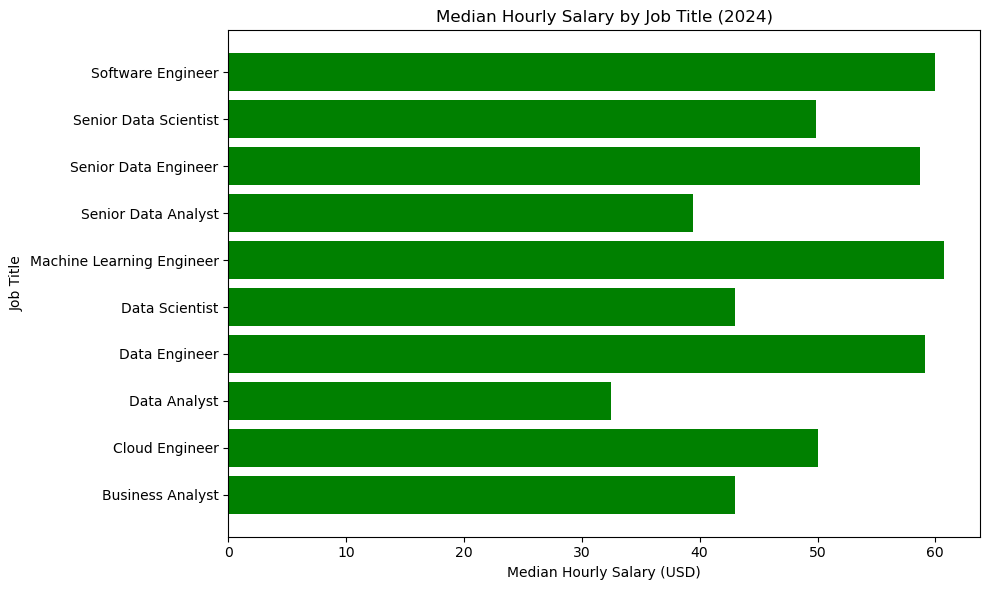

In [54]:
titles = job_title_median_hourly.index.tolist()
salaries = job_title_median_hourly.values.tolist()

plt.figure(figsize=(10, 6))
plt.barh(titles, salaries, color='green')
plt.xlabel("Median Hourly Salary (USD)")
plt.ylabel("Job Title")
plt.title("Median Hourly Salary by Job Title (2024)")
plt.tight_layout()
plt.show()

Unsurprisingly, Seniors roles pay more. Machine learning and Data engineers also earn quite a lot. Data analysts are very clearly earning the least out of this bunch.

### Let's see how many remote and onsite jobs there are
There seems to be about 4x as many onsite jobs compared to remote

In [45]:
job_work_from_home_groups = df.groupby('job_work_from_home')
job_work_from_home_groups.describe()  #There are about 4x as many onsite jobs compared to remote

salary_year_avg                                        \
                             count           mean           std      min   
job_work_from_home                                                         
False                      16429.0  117855.647270  46460.784442  15000.0   
True                        3906.0  132080.327701  53625.774485  15000.0   

                                                          salary_hour_avg  \
                        25%       50%       75%       max           count   
job_work_from_home                                                          
False               85000.0  112500.0  142000.0  920000.0          7956.0   
True                91000.0  129550.0  166740.0  445000.0          2120.0   

                                                                           
                         mean        std  min    25%    50%    75%    max  
job_work_from_home                                                         
False               48.204236  19.691744  9.7  30.75  47.62  61.16  220.0  
True                52.761920  40.565658  8.0  25.50  41.50  65.00  250.0

### Let's see what the distribution of the different jobs is looking like.

In [40]:
job_title_count = job_title_groups['job_title_short'].count()
job_title_count

job_title_short
Business Analyst              28584
Cloud Engineer                 6839
Data Analyst                 112866
Data Engineer                128994
Data Scientist                97664
Machine Learning Engineer     12860
Senior Data Analyst           15347
Senior Data Engineer          30608
Senior Data Scientist         21731
Software Engineer             23402
Name: job_title_short, dtype: int64

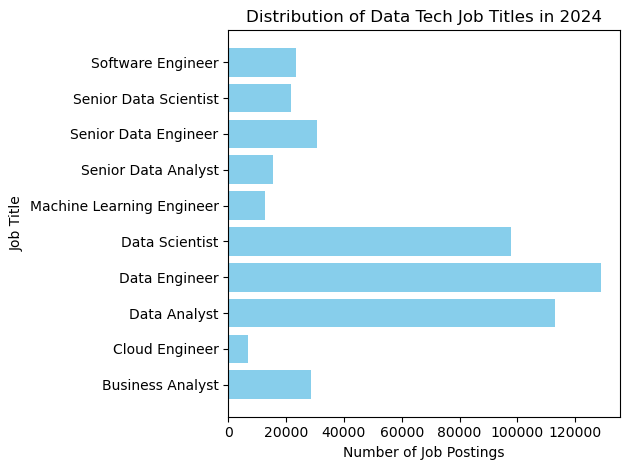

In [43]:
job_titles = job_title_count.index.tolist()
counts = job_title_count.values.tolist()


plt.barh(job_titles, counts, color='skyblue')
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Title")
plt.title("Distribution of Data Tech Job Titles in 2024")
plt.tight_layout()
plt.show()

### I'm interested in seeing which countries have the most job listings

In [74]:
country_job_listings = df.groupby('job_country')['job_title_short'].count()
country_job_listings_sorted = country_job_listings.sort_values(ascending=False).head(15)

country_job_listings_sorted

job_country
United States     140365
India              39263
United Kingdom     35684
France             22562
Germany            18869
Spain              13033
Canada             11754
Netherlands        10952
Sudan              10688
Singapore          10051
Italy               8469
Poland              8182
Philippines         8169
Mexico              8013
Belgium             6899
Name: job_title_short, dtype: int64

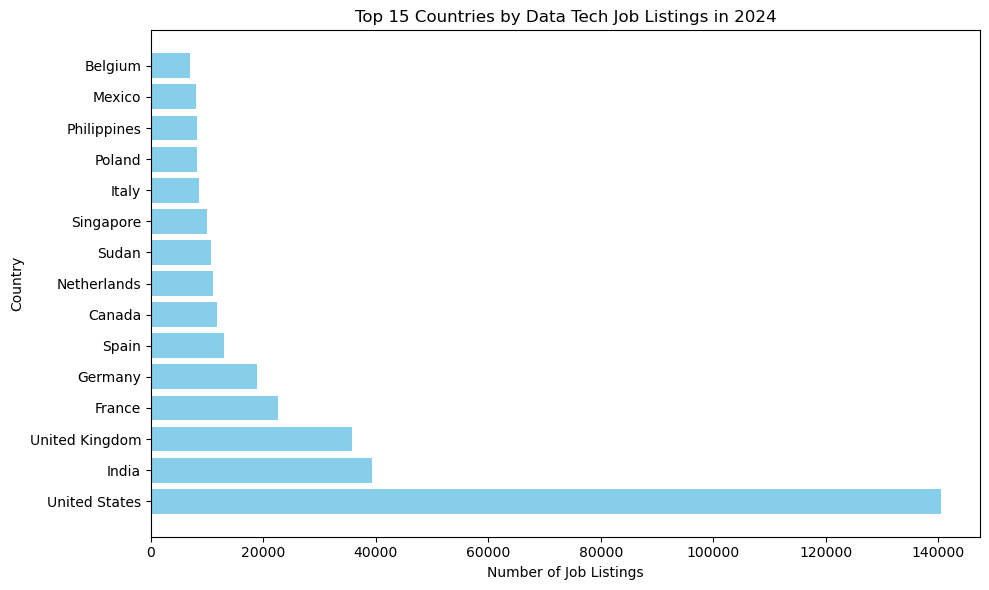

In [75]:
countries = country_job_listings_sorted.index.tolist()
counts = country_job_listings_sorted.values.tolist()

plt.figure(figsize=(10, 6))
plt.barh(countries, counts, color='skyblue')
plt.xlabel("Number of Job Listings")
plt.ylabel("Country")
plt.title("Top 15 Countries by Data Tech Job Listings in 2024")
plt.tight_layout()
plt.show()